# 3 Basic Parameter Estimation Techniques

## 3.1 Discrepancy Function

To maximize the similarity between data and model predictions, the discrepancy function must be minimized. Other names for the discrepancy functions include: objective functions, cost functions, or error functions. 

The book shows some example data, which I simulated below, to create something roughly similar. In the original data, peoples recall of 60 random facts was tested on days following exposure. The x-axis was the day tested (since exposure). The y-axis was the proportion of facts retained.


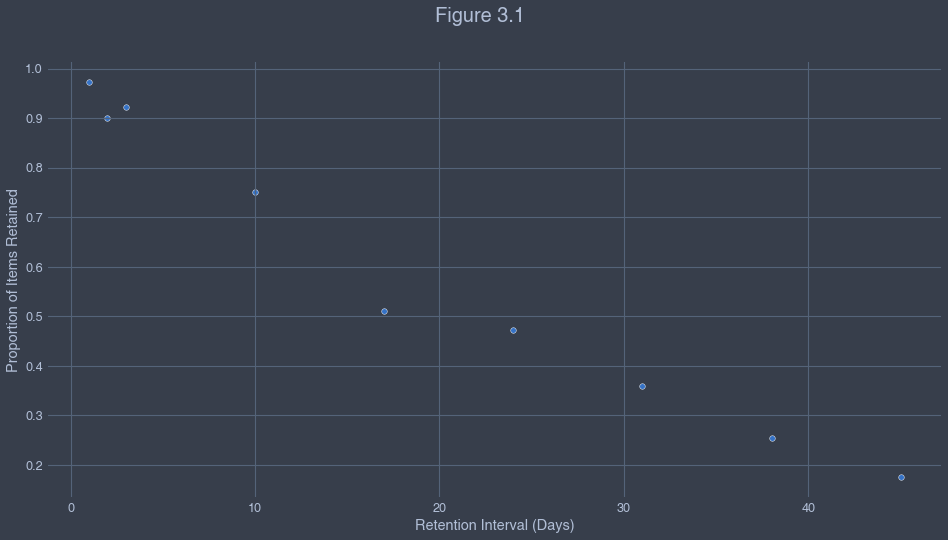

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style('onedork',
             spines=False,
             figsize=(20, 10)) 

def gen_exp_decay_data(days, scale):
    '''
    Take a vector of days and return simulated data decaying exponentially
    over time with a max of 1 and min of 0. Gaussian noise is added.
    
    Parameters
    ----------
    days : numpy.ndarray
        A vector of days at which hypothetical measurements are taken
    
    scale : float, int
        Arbitrary scaling parameter.
    
    Returns
    -------
    measurements : numpy.ndarray
    '''
    basis = np.exp(-days/scale)
    noise = np.random.normal(loc=0, scale=0.03, size=len(days))
    measurements = basis + noise
    return measurements

days = np.array([1,2,3,10,17,24,31,38,45])
sim_data = gen_exp_decay_data(days, 30) # 30 roughly matches book figure 3.1

sns.scatterplot(x=days, y=sim_data)
plt.ylabel('Proportion of Items Retained')
plt.xlabel('Retention Interval (Days)')
plt.figtext(0.5, 0.95, 'Figure 3.1', wrap=True, horizontalalignment='center', fontsize=20);

The original study (Carpenter et al 2008), used power function to model the forgetting:

\begin{equation}
p = a(bt+1)^{-c}
\end{equation}

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>p</td>
    <td>Predicted probability of recall</td>
  </tr>
  <tr>
    <td>t</td>
    <td>Time</td>
  </tr>
  <tr>
    <td>a</td>
    <td>Free parameter</td>
  </tr>
  <tr>
    <td>b</td>
    <td>Free parameter</td>
  </tr>
  <tr>
    <td>c</td>
    <td>Free parameter</td>
  </tr>
  
</table>


### 3.1.1 Root Mean Squared Deviation (RMSD)

RMSD is a common, simple discrepancy function. It is also known as "least-squares" as it minimizes the squared distances between data and predictions. 

<br>

\begin{equation}
  RMSD = \sqrt{\frac{ \sum_{j=1}^{J}(d_{j} - p_{j})^{2}}{J}}
\end{equation}

<br>

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>J</td>
    <td>The number of data points over which the sum is taken</td>
  </tr>
  <tr>
    <td>d</td>
    <td>Vector of data points</td>
  </tr>
  <tr>
    <td>p</td>
    <td>Vector of predictions</td>
  </tr>
</table>

<br>

If the RMSD value is 0.025 for example, this means the predictions of the power forgetting model differ from the data by 2.5 % on average (in the units of measurement).

<br>

It is common to fit RMSD to group averages, (e.g means), rather than to each individual measurement. This is why $J$ is given as the denominator, rather than $N$, which is often the notation for the number of observations.

<br>

RMSD assumes data are measured on a continuous or fixed interval scale. Problems can occur, for example, when participants must respond on a 0 - 10 point scale. Neutral points like 5 -> 6 or 5-> 4 may mean something psychologically different than at extreme points 9 -> 10 or 0 -> 1.

### 3.1.2 Chi-Squared ($\chi^{2}$) and $G^{2}$

Appropriate for discrete data. For example, when the number of responses is constant but each response falls in a distinct category.

The $\chi^{2}$ is defined:

\begin{equation}
  \chi^2 = \sum_{j=1}^{J} \frac{(O_j - Np_j)^2}{Np_j}
\end{equation}

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>J</td>
    <td>Number of response categories</td>
  </tr>
  <tr>
    <td>N</td>
    <td>The total number of observed responses (sample size)</td>
  </tr>
  <tr>
    <td>$O_j$</td>
    <td>The number of observed responses within each category j</td>
  </tr>
  <tr>
    <td>$p_j$</td>
    <td>Model predictions as probabilities</td>
  </tr>
</table>

<br>

Note: $\sum_{j=1}^{J}O_j = N$, and $N \times p_j$ gives predicted counts (a.k.a, expected).

<br>

The $G^2$ (a.k.a log-likelihood ratio) is defined:

\begin{equation}
  G^2 = 2\sum_{j=1}^{J}O_j\log\{O_j/(Np_j)\}
\end{equation}

<br>

They can generally be used interchangeably, however the differences are reviewed by Cressie and Read (1989).

<br>

These models are sometimes desirable as they can be interpreted as a test statistic. However in most situations, it is the *relative* fit of models is more relevant.

<br>

Caution with $\chi^2$: 
1. The number of observed/expected responses should not be bellow 5. If necessary, collapse smaller categories into larger ones.
2. Even when the degrees of freedom ($df = J - n_p -1$) is constant, increasing $N$ can increase the magnitude of $\chi^2$ as even small variations variations due to noise are amplified by a factor of $N$. This results in being overly sensitive to slight departures from predictions, when used as a statistical test.


## 3.2 Fitting Models to Data: Parameter Estimation Techniques

**Least squares**: Conceptually simple, minimizes the the discrepancy between the model and the data. However, there are typically no known statistical properties. It is difficult to make statistical comparisons between two RMSD values, between models for example. The parameter estimates also do not come with statistical properties, such as statistical confidence.
<br>
**Maximum Likelihood**: More deeply rooted in statistics. Also minimizes the discrepancy between predictions and data, the function has known (provable) statistical properties.

<br>

## 3.3 Least-Squares Estimation in a Familiar Context

A liner model is used to discuss least-squares parameter estimation. A linear model can defined as:

\begin{equation}
  y_i = b_0 + b_{1}x_i + e_i
\end{equation}

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>$y_i$</td>
    <td>The dependent variable, a function of the measurement of $x_i$</td>
  </tr>
  <tr>
    <td>$x_i$</td>
    <td>The independent variable</td>
  </tr>
  <tr>
    <td>$b_0$</td>
    <td>Intercept (to be estimated) </td>
  </tr>
  <tr>
    <td>$b_1$</td>
    <td>Slope (to be estimated)</td>
  </tr>
  <tr>
    <td>$e_i$</td>
    <td>Error term</td>
  </tr>
</table>

<br>

In python it is very simple to run a linear regression:


In [5]:
from sklearn import linear_model as lm

b_0 = 3 # intercept
b_1 = 2 # slope

# example data
predictor_values = np.array([1, 4, 6, 7])[:, None]
outcome_values = b_1*predictor_values + b_0

# Create linear regression object
ex_regr = lm.LinearRegression()
# Train the model using the training sets
ex_regr.fit(predictor_values, outcome_values)

print('Example predictions (y): \n',
      ex_regr.predict(np.array([[100], [10], [5]])))
print('b_0:', ex_regr.intercept_, '\nb_1:', regr.coef_)

Example predictions (y): 
 [[203.]
 [ 23.]
 [ 13.]]


NameError: name 'regr' is not defined

For linear data, there is a simple algebraic solution. However, in many cases this is not possible and parameters must be estimated iteratively. 

<br>

### 3.3.1 Visualizing Modeling

Parameter estimation techniques are often general. The techniques discussed in this chapter can be applied to any model. 

In [41]:
from sklearn.metrics import mean_squared_error as rmsd
predictor_values = np.arange(10)[:, None]
test_regr = lm.LinearRegression()
test_regr.coef_ = np.array([2])
test_regr.intercept_ = np.array([3])
outcome_values = test_regr.predict(predictor_values)
print(rmsd(predictor_values, outcome_values))

def score_lm_params(coef, intercept, data):
    """Take a coefficient and an intercept and construct a linear model. Once
    constructed, check the route mean squared deviation (RMSD) between
    predictions and data
    
    Parameters
    ----------
    coef : float
        The coefficient or slope of the linear model.
        
    intercept : float
        The y axis intercept of the linear model.
        
    data : numpy.ndarray
        An array of numerical data values.
    """    
    regr = lm.LinearRegression()
    regr.coef_ = np.array([coef])
    regr.intercept_ = np.array([intercept])
    
    data = data.reshape(-1, 1) # force column
    predictions = regr.predict(data)
    return rmsd(data, predictions)

print(score_lm_params(2, 3,  np.arange(1, 11, 1)))

def every_combo_until(x):
    until_x = np.arange(1, x+1, 1)
    xs = np.repeat(until_x, x)
    ys = np.tile(until_x, x)
    return xs, ys

every_combo_until(4)

# From the scratchpad
def every_combo_until(x):
    until_x = np.arange(1, x+1, 1)
    xs = np.repeat(until_x, x)
    ys = np.tile(until_x, x)
    return xs, ys
a,b = every_combo_until(3) 

data = np.arange(9).reshape(-1,1)
regr = lm.LinearRegression()
regr.coef_ = a.reshape(-1, 1)
regr.intercept_ = b.reshape(1, -1)
predictions = regr.predict(data)
#rmsd(data, predictions)
predictions, a, b

# Feed every combo into intercept and slope, then plot output using xs and xy
# as coordinates
# Idea, vary params, plot score on mesh
# https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.16-3D-Surface-Plots/
# https://python-graph-gallery.com/371-surface-plot/

64.5
80.5


(array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]),
 array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]))

In [24]:
predictor_values = np.arange(10)[:, None]
test_regr = lm.LinearRegression()
test_regr.coef_ = np.array([2])
test_regr.intercept_ = np.array([3])
outcome_values = test_regr.predict(predictor_values)
outcome_values

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21])